In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [159]:
#os.chdir("C:\\Users\\Sairam Yerramsetti\\Documents\\DATA SCIENCE\\DataSets")
os.chdir("C:\\Users\\SAIRAM YERRAMSETTI\\Documents\\data sets")
x=pd.read_csv("titanic.csv")
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
s1=x[x["Survived"]==0] ["Age"]
s2=x[x["Survived"]==1] ["Age"]

In [161]:
stats.ttest_ind(s1,s2,nan_policy="omit")

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348333)

In [162]:
c=pd.crosstab(x.Survived,x.Sex)
c

Sex,female,male
Survived,,
0,81,468
1,233,109


In [163]:
import scipy.stats as stats
stats.chi2_contingency(c)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 355.52525253],
        [120.52525253, 221.47474747]]))

In [164]:
x.drop(["PassengerId","Pclass","Name","SibSp","Parch","Ticket","Cabin","Age"],axis=1,inplace=True)
x.head()

,Survived,Sex,Fare,Embarked
0,0,male,7.2500,S
1,1,female,71.2833,C
2,1,female,7.9250,S
3,1,female,53.1000,S
4,0,male,8.0500,S


In [165]:
v=pd.get_dummies(x["Sex"])
v.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [166]:
x=pd.concat([x,v],axis=1)
x.head()

,Survived,Sex,Fare,Embarked,female,male
0,0,male,7.2500,S,0,1
1,1,female,71.2833,C,1,0
2,1,female,7.9250,S,1,0
3,1,female,53.1000,S,1,0
4,0,male,8.0500,S,0,1


In [167]:
z=pd.get_dummies(x["Embarked"])
z.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [168]:
x=pd.concat([x,z],axis=1)
x.head()

,Survived,Sex,Fare,Embarked,female,male,C,Q,S
0,0,male,7.2500,S,0,1,0,0,1
1,1,female,71.2833,C,1,0,1,0,0
2,1,female,7.9250,S,1,0,0,0,1
3,1,female,53.1000,S,1,0,0,0,1
4,0,male,8.0500,S,0,1,0,0,1


In [169]:
a=x["female"].values.reshape(-1,1)
b=x["Survived"].values.reshape(-1,1)

In [170]:
lm=LogisticRegression()
lm.fit(a,b)

C:\Users\KATA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KATA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [171]:
lm.score(a,b)

0.7867564534231201

In [172]:
lm.intercept_

array([-1.41417439])

In [173]:
lm.coef_

array([[2.43070907]])

In [174]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=0)

In [175]:
log=LogisticRegression()
log.fit(x_train,y_train)

C:\Users\KATA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KATA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [176]:
pred=log.predict(x_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [178]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

   micro avg       0.79      0.79      0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [179]:
print(precision_score(y_test,pred))

0.7313432835820896


In [180]:
print(recall_score(y_test,pred))

0.7101449275362319


In [181]:
print(f1_score(y_test,pred))

0.7205882352941175


In [182]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[92, 18],
       [20, 49]], dtype=int64)

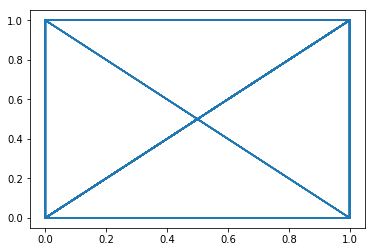

In [183]:
plt.plot(y_test,pred)


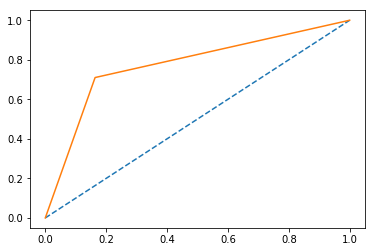

In [201]:
from sklearn.metrics import roc_curve
pred_proba=log.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,pred_proba)
plt.plot([0,1],"--")
plt.plot(fpr,tpr)
plt.show()

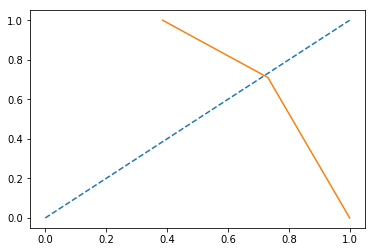

In [207]:
from sklearn.metrics import precision_recall_curve
pred_proba=log.predict_proba(x_test) [:,1]
fpr,tpr,thresholds=precision_recall_curve(y_test,pred_proba)
plt.plot([0,1],"--")
plt.plot(fpr,tpr)
plt.show()

In [202]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,pred_proba)

0.7732542819499342